# Decision tree
- Iris dataset
- 2 features
- Multiclass

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [44]:
import os
imagePath = os.path.join(os.getcwd(),'Images')
if (not(os.path.isdir(imagePath))):
    os.mkdir(imagePath)

In [45]:
# Read data
iris = datasets.load_iris()

In [46]:
# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

In [47]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [48]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [49]:
param = "ex2"
paramSet = {
    "ex1": {"criterion": "gini", "max_depth": 4},
    "ex2": {"criterion": "entropy", "max_depth": 4},
    "ex3": {"criterion": "gini", "max_depth": 8},
}
params = paramSet[param]

In [50]:
# Creating objects
tree_model = DecisionTreeClassifier(
    criterion=params["criterion"], max_depth=params["max_depth"], random_state=1
)

In [51]:
# Training
tree_model.fit(X_train_std, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [52]:
# Prediction
y_pred = tree_model.predict(X_test_std)

In [53]:
# Misclassification from the test samples
sumMiss = (y_test != y_pred).sum()

In [54]:
# Accuracy score from the test samples
accuracyScore = accuracy_score(y_test, y_pred)

In [55]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")

Misclassified examples: 3
Accuracy score: 0.9333333333333333


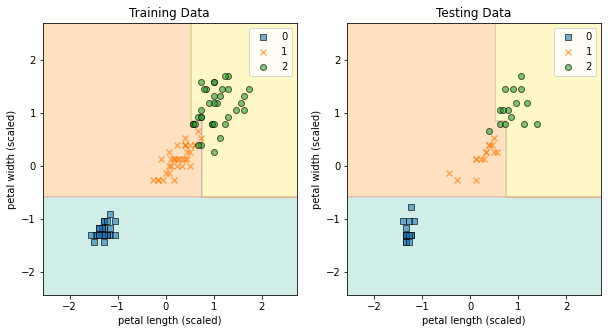

In [56]:
filenamePNG = "Images/T41_DT_" + param + ".png"
plot_decision_surface_train_test(
    X_train_std, X_test_std, y_train, y_test, tree_model, filename=filenamePNG
)

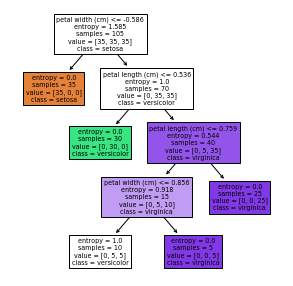

In [57]:
# Visualization: Plot tree
fig, ax = plt.subplots(1, figsize=(5, 5))
tree.plot_tree(
    tree_model,
    feature_names=iris.feature_names[2:4],
    class_names=iris.target_names,
    filled=True,
)
#filenamePDF = "T41_tree_visualize_" + param + ".pdf"
#fig.savefig(filenamePDF) 